# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

- The link where the data was downloaded is: http://insideairbnb.com/get-the-data/. 
- This dataset is specifically the listings in NYC. 
- The data columns can be explained when clicking on this link https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing. 
- Data used in this project was scraped on December 15, 2022.

# Loading and Preparing Datasets

In [2]:
# Kept the original dataset in case we need want to analyze those as a separate group
listingsNYC_with_nulls = pd.read_csv('listings.csv', dtype=object)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,41533,41520,41533,41528,41533,41533,41533,41533,41533,41533,41533,41533,32140,32140,41533,41533,41533,1
unique,41533,40242,26832,9628,5,223,20415,17825,4,1287,126,468,2715,931,66,366,167,1
top,5136,Water View King Bed Hotel Room,107434423,Blueground,Manhattan,Bedford-Stuyvesant,40.76153,-73.99878,Entire home/apt,150,30,0,2022-11-20,0.02,1,0,0,41662/AL
freq,1,30,487,487,17334,2936,50,50,23526,1228,17625,9393,1031,1024,22113,13669,20388,1


In [3]:
# Dropping all of the columns which we will not use
listingsNYC= listingsNYC_with_nulls.drop(['last_review','license','latitude','longitude','host_name'], axis=1)

# Dropping all rows with any 'Nan' values in them
listingsNYC.dropna(axis=0, how='any', inplace=True)

### Changing dtypes for the columns

In [4]:
# checking all of the dtypes of the columns
print('Datatypes before \n')
print(listingsNYC.dtypes)
print('\n')

#defining all of the data column types
data_types_dict = {
    'price':'int64', 
    'minimum_nights':'int64', 
    'host_id':str,
    'number_of_reviews':'int64',
    'reviews_per_month':float,
    'calculated_host_listings_count':'int64',
    'availability_365':'int64',
    'number_of_reviews_ltm':'int64'}

#changing all the datatype to their respective types that we can work with
listingsNYC = listingsNYC.astype(data_types_dict)
#checking to see that the dtypes were changed
print('Datatypes after \n')
print(listingsNYC.dtypes)

Datatypes before 

id                                object
name                              object
host_id                           object
neighbourhood_group               object
neighbourhood                     object
room_type                         object
price                             object
minimum_nights                    object
number_of_reviews                 object
reviews_per_month                 object
calculated_host_listings_count    object
availability_365                  object
number_of_reviews_ltm             object
dtype: object


Datatypes after 

id                                 object
name                               object
host_id                            object
neighbourhood_group                object
neighbourhood                      object
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 fl

### Adding Price Per Night (ppn) column

In [5]:
# creating a price per night (ppn) column with the price and minimim nights columns and rounding to 2 decimal places. 
# This is a float dtype 
listingsNYC['ppn'] = (listingsNYC['price']/listingsNYC['minimum_nights']).round(2)
listingsNYC

,id,name,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,ppn
0,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,Brooklyn,Sunset Park,Entire home/apt,275,21,3,0.03,1,267,1,13.10
1,5203,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,Private room,75,2,118,0.73,1,0,0,37.50
2,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,Private room,60,30,50,0.30,2,322,0,2.00
3,5178,Large Furnished Room Near B'way,8967,Manhattan,Midtown,Private room,68,2,559,3.38,1,79,50,34.00
4,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,Entire home/apt,175,30,49,0.31,3,365,1,5.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41139,769580756557673403,Cozy 1 bedroom with 2 full beds ROOM #2,162927656,Queens,Jamaica,Shared room,99,1,1,1.00,7,174,1,99.00
41160,769612968972941927,Comfortable 1 bedroom ROOM #3,162927656,Queens,Jamaica,Shared room,91,1,1,1.00,7,174,1,91.00
41175,770593748958588679,Luxury Brooklyn apt. | 10 mins away from JFK,489532090,Brooklyn,East New York,Entire home/apt,145,1,2,2.00,1,351,2,145.00
41218,769850569510129629,Private Bed Manhattan 20 Mins,324722741,Queens,Woodside,Private room,50,1,1,1.00,1,240,1,50.00


### Removing Outliers

In [6]:
# check for outliers 
describe_df = listingsNYC.describe()
describe_df

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,ppn
count,32134.000000,32134.000000,32134.000000,32134.000000,32134.000000,32134.000000,32134.000000,32134.000000
mean,196.275223,16.139354,33.867866,1.279502,10.636958,142.513506,10.318883,73.160086
std,831.541622,28.483042,61.803678,1.935213,38.325794,141.416457,20.526149,367.427320
min,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000
25%,80.000000,2.000000,3.000000,0.140000,1.000000,0.000000,0.000000,4.170000
50%,130.000000,5.000000,10.000000,0.580000,1.000000,89.000000,2.000000,24.670000
75%,208.000000,30.000000,36.000000,1.880000,3.000000,306.000000,13.000000,80.000000
max,98159.000000,1250.000000,1666.000000,102.980000,487.000000,365.000000,992.000000,49079.500000


In [7]:
def get_outlier_bounds(col_name):
    '''
    Gets the bound for outliers in the dataset. This is to make the visualizations easier. This function is 
    specifically for this usage and dataset
     
    Param:
        col_name: the name of the column for which you want the bounds. Must be a numerical column
    Return:
        A tuple with the col_name, upper_bound and lower_bound
    '''
    iqr = describe_df.loc['75%',col_name] - describe_df.loc['25%',col_name]
    upper_bound = describe_df.loc['75%',col_name] + (1.5* iqr)
    lower_bound = describe_df.loc['25%',col_name] - (1.5*iqr)
#     print(col_name)
#     print('upper bound ' + upper_bound.astype(str))
#     print('lower bound ' + lower_bound.astype(str))
#     print('-'*50)
    return (col_name,upper_bound,lower_bound)

In [8]:
#filtering out the outliers
# We only want the numeric columns because the get_outlier_bounds won't work on strings
numeric_cols = listingsNYC.select_dtypes(include=np.number)
for column in numeric_cols.columns:
    listingsNYC = listingsNYC[(listingsNYC[column] < get_outlier_bounds(column)[1]) & (listingsNYC[column] > get_outlier_bounds(column)[2])]
listingsNYC.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,ppn
count,19484.000000,19484.000000,19484.000000,19484.000000,19484.000000,19484.000000,19484.000000,19484.000000
mean,135.756980,17.061332,15.016526,0.736856,1.595001,107.791521,4.549374,32.246544
std,78.184813,13.690367,18.319170,0.935200,1.034317,136.005906,7.333113,40.824405
min,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000
25%,75.000000,3.000000,2.000000,0.080000,1.000000,0.000000,0.000000,3.330000
50%,119.000000,28.000000,7.000000,0.330000,1.000000,24.000000,1.000000,9.000000
75%,178.000000,30.000000,20.000000,1.000000,2.000000,206.000000,6.000000,50.000000
max,399.000000,70.000000,85.000000,4.480000,5.000000,365.000000,32.000000,193.000000


# Visualizations

Text(0.5, 1.0, 'Histogram of Price')

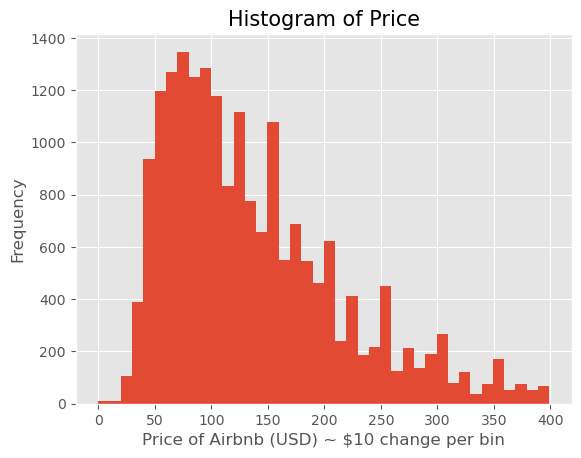

In [14]:
plt.hist((listingsNYC['price']), bins = 40)
plt.xlabel('Price of Airbnb (USD) ~ $10 change per bin')
plt.ylabel('Frequency')
plt.title('Histogram of Price', fontsize = 15)

(array([25012.,  8552.,  4088.,  1777.,   708.,   410.,   326.,   242.,
          207.,   211.]),
 array([   0. ,  128.6,  257.2,  385.8,  514.4,  643. ,  771.6,  900.2,
        1028.8, 1157.4, 1286. ]),
 <BarContainer object of 10 artists>)

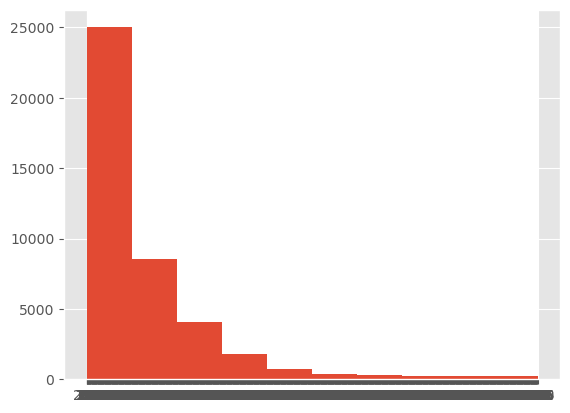

In [10]:
plt.hist(listingsNYC_with_nulls['price'].dropna(axis=0, how='any'), bins = 10)

Text(0.5, 1.0, 'Histogram of Price per Night (ppn)')

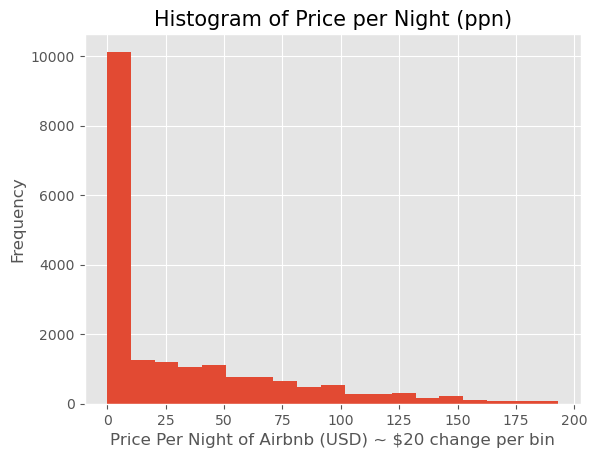

In [11]:
plt.hist(listingsNYC['ppn'], bins = 19)
plt.xlabel('Price Per Night of Airbnb (USD) ~ $20 change per bin')
plt.ylabel('Frequency')
plt.title('Histogram of Price per Night (ppn)', fontsize = 15)

In [12]:
# finding the mean price and price per night of each room_type
room_type_groups = listingsNYC.groupby('room_type')
room_type_groups[['price','ppn']].mean()
avg_prices_by_room_type = room_type_groups[['price','ppn']].mean()
avg_prices_by_room_type

,price,ppn
room_type,,
Entire home/apt,174.779170,36.406855
Hotel room,115.238095,37.534762
Private room,85.186650,26.906062
Shared room,75.657143,23.089476


In [13]:
# finding the means of each neighbourhood_group
neighborhood_groups = listingsNYC.groupby('neighbourhood_group')
avg_prices_by_neighborhood = neighborhood_groups[['price','ppn']].mean()
avg_prices_by_neighborhood

,price,ppn
neighbourhood_group,,
Bronx,99.971765,42.902682
Brooklyn,131.216398,32.171132
Manhattan,156.516771,26.229325
Queens,114.055501,41.782690
Staten Island,117.485714,46.186381
